In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
# Define constants
IMG_HEIGHT = 255
IMG_WIDTH = 255
batch_size = 32
epochs = 10

In [5]:

# Data preprocessing
train_data_gen = ImageDataGenerator(rescale=1./255)
train_generator = train_data_gen.flow_from_directory(
    directory=r'H:\DataScience-Lab\Sem-2\FDS\Data\training_set\training_set',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary'
)

Found 8005 images belonging to 2 classes.


In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [7]:
ann = Sequential()

In [8]:
ann.add(Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
ann.add(tf.keras.layers.Dense(units=6, activation="relu"))
ann.add(tf.keras.layers.Dense(units=6, activation="relu"))
ann.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [9]:
ann.compile(
    optimizer = "Adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

In [10]:
ann.fit(train_generator, batch_size = 32, epochs=10)

Epoch 1/10
251/251 [==============================] - 37s 134ms/step - loss: 0.6933 - accuracy: 0.5001
Epoch 2/10
251/251 [==============================] - 34s 135ms/step - loss: 0.6932 - accuracy: 0.4961
Epoch 3/10
251/251 [==============================] - 34s 135ms/step - loss: 0.6932 - accuracy: 0.5003
Epoch 4/10
251/251 [==============================] - 34s 137ms/step - loss: 0.6932 - accuracy: 0.4997
Epoch 5/10
251/251 [==============================] - 34s 135ms/step - loss: 0.6932 - accuracy: 0.4978
Epoch 6/10
251/251 [==============================] - 34s 136ms/step - loss: 0.6932 - accuracy: 0.4963
Epoch 7/10
251/251 [==============================] - 36s 144ms/step - loss: 0.6932 - accuracy: 0.4919
Epoch 8/10
251/251 [==============================] - 35s 137ms/step - loss: 0.6932 - accuracy: 0.4919
Epoch 9/10
251/251 [==============================] - 35s 138ms/step - loss: 0.6932 - accuracy: 0.4958
Epoch 10/10
251/251 [==============================] - 35s 140ms/step - l

In [12]:
test_data_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_data_gen.flow_from_directory(
    directory=r'H:\DataScience-Lab\Sem-2\FDS\Data\test_set\test_set',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 2023 images belonging to 2 classes.


In [13]:
y_pred = ann.predict(test_generator)
y_pred = (y_pred > 0.5)

64/64 [==============================] - 8s 122ms/step


In [14]:
from sklearn.metrics import accuracy_score

In [15]:
y_test_flat = test_generator.classes
y_pred_flat = y_pred.flatten()

accuracy = accuracy_score(y_test_flat, y_pred_flat)

print("Accuracy Score:", accuracy)

Accuracy Score: 0.5002471576866041


In [16]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

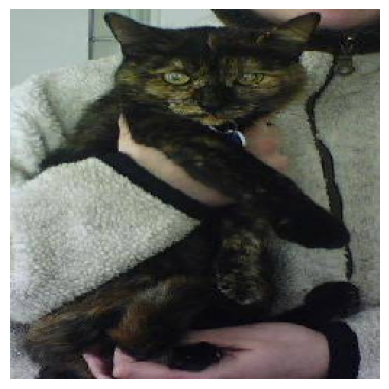

1/1 [==============================] - 0s 176ms/step
Predicted class: Dog


In [18]:
def predict_image_class(image_path, model):
    img = image.load_img(image_path, target_size=(255, 255))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image

    prediction = model.predict(img_array)
    if prediction[0] < 0.5:
        return 'Cat'
    else:
        return 'Dog'

image_path = r"H:\DataScience-Lab\Sem-2\FDS\Data\test_set\test_set\cats\cat.4039.jpg"
predicted_class = predict_image_class(image_path, ann)
print("Predicted class:", predicted_class)

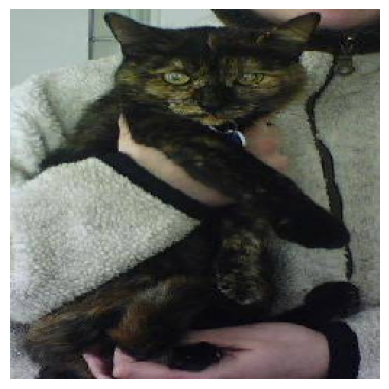

1/1 [==============================] - 0s 40ms/step
Predicted class: Dog


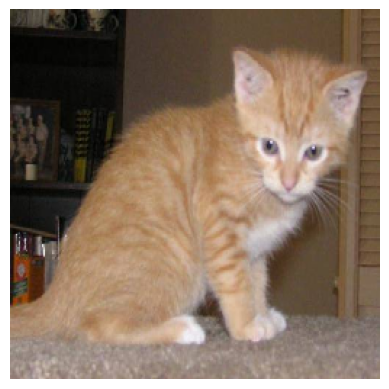

1/1 [==============================] - 0s 57ms/step
Predicted class: Dog


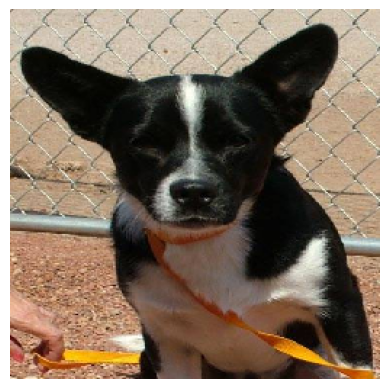

1/1 [==============================] - 0s 58ms/step
Predicted class: Dog


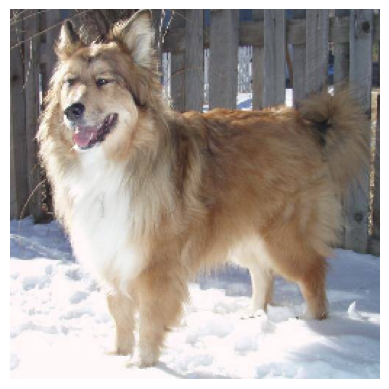

1/1 [==============================] - 0s 47ms/step
Predicted class: Dog


In [26]:
# Multiple Image 


import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

def predict_image_class(image_path, model):
    img = image.load_img(image_path, target_size=(255, 255))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image

    prediction = model.predict(img_array)
    if prediction[0] < 0.5:
        return 'Cat'
    else:
        return 'Dog'

def predict_multiple_images(image_paths, model):
    for image_path in image_paths:
        predicted_class = predict_image_class(image_path, model)
        print(f"Predicted class: {predicted_class}")

# Assuming `ann` is your model
# Assuming `image_paths` is a list of paths to multiple images
image_paths = [
    r"H:\DataScience-Lab\Sem-2\FDS\Data\test_set\test_set\cats\cat.4039.jpg",
    r"H:\DataScience-Lab\Sem-2\FDS\Data\test_set\test_set\cats\cat.4003.jpg",
    r"H:\DataScience-Lab\Sem-2\FDS\Data\test_set\test_set\dogs\dog.4031.jpg",
    r"H:\DataScience-Lab\Sem-2\FDS\Data\test_set\test_set\dogs\dog.4006.jpg",
    # Add more image paths here
]

predict_multiple_images(image_paths, ann)


In [32]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

# Define a function to load and preprocess an image, and then make predictions
def predict_image_class(image_path, model):
    img = image.load_img(image_path, target_size=(255, 255))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image

    prediction = model.predict(img_array)
    if prediction[0] < 0.5:
        return 'Cat'
    else:
        return 'Dog'

# Define the directory containing the images
directory = r"H:\DataScience-Lab\Sem-2\FDS\Data\test_set"

# Load your model (replace 'ann' with your actual model)
ann = Sequential()

ann.add(Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
ann.add(tf.keras.layers.Dense(units=6, activation="relu"))
ann.add(tf.keras.layers.Dense(units=6, activation="relu"))
ann.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

ann.compile(
    optimizer = "Adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

ann.fit(directory, batch_size = 32, epochs=10)
# Iterate through all files in the directory
for filename in os.listdir(directory):
    # Check if the file is an image (assuming JPEG format here, you can add more formats if needed)
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        # Construct the full path to the image file
        image_path = os.path.join(directory, filename)
        
        # Apply the model to the image and print the result
        predicted_class = predict_image_class(image_path, ann)
        print(f"Image: {filename} - Predicted class: {predicted_class}")


IndexError: tuple index out of range